# Histogram

**The histogram** is an extremely important tool for data-analysis. Histogram is a diagram where different values of a variable are arranged in columns, resulting in a graphical representation of the data distribution. The range of values in each column, called "bin", is determined before constructing the histogram. In histogram, bins are on the x-axis and the corresponding frequencies are on the y-axis.

Let's use data from the NHL player statistics. The data is from [QuantHockey website](https://www.quanthockey.com/nhl/players/a.php) and it includes information about over 8000 players.

In [1]:
# Import the needed modules. Pandas is for the data-analysis, numpy for scientific calculation,
# and matplotlib.pyplot for making plots. Modules are named as pd, np, and plt, respectively.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Store the dataset in a variable.
%matplotlib inline
nhl_data = pd.read_csv("https://raw.githubusercontent.com/opendata-education/Python-ja-Jupyter/main/materiaali/harjoitukset/NHL-players.csv")
nhl_data.head()

,Name,Pos,Birthdate,Birth City,Country,GP,G,A,P,PIM
0,"Aalto, Antti",F,03/04/1975,Lappeenranta,Finland,151,11,17,28,52
1,"Abbott, George",G,08/03/1911,"Sydenham, Ontario",Canada,1,0,0,0,0
2,"Abbott, Reg",F,02/04/1930,"Winnipeg, Manitoba",Canada,3,0,0,0,0
3,"Abbott, Spencer",F,04/30/1988,"Hamilton, Ontario",Canada,2,0,0,0,0
4,"Abdelkader, Justin",F,02/25/1987,"Muskegon, Michigan",United States,739,106,146,252,608


We want to inspect the distribution of the players' birth months. Would it be possible that there are much more players born in some months as opposed to others?

In [3]:
#Take the birhtdays from the data and modify it so that we only consider months.
#Understanding the code here isn't important for understanding the rest of the exercise.
birthdays = pd.to_datetime(nhl_data['Birthdate'],format='%m/%d/%Y')
months = birthdays.dt.month

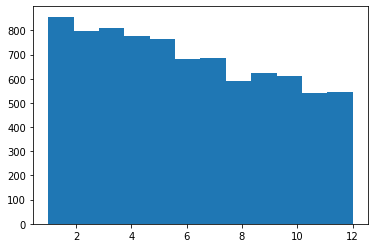

In [4]:
#Draw a histogram of the players' birth months
plt.hist(months, bins=12)
plt.show()

Great, we created our first histogram! We can make it more beautiful by naming the axes and adding other features.

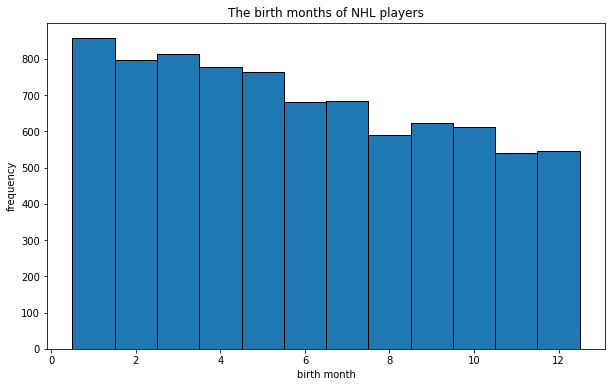

In [5]:
fig, ax = plt.subplots()  #Save the figure and its axes in variables
fig.set_figheight(6)   
fig.set_figwidth(10)      #Adjust the size of the figure
bins = np.arange(1,14)    #We'll use the 'arange'-method from the NumPy library in order to get the bins to the right place in the graph.
plt.hist(months, bins=bins,edgecolor='k', align='left')  #The variable 'edgecolor' helps us to differentiate between bins. The 'align' variable aligns the bins correctly.  
plt.title('The birth months of NHL players')  #Name the figure
plt.xlabel('birth month')   #Name the x-axis
plt.ylabel('frequency')     #Name the y-axis
plt.show()

Now it looks better! Changing the amount of bins we can make new observations. For example, it may be useful to see how many players are born in the first half of the year, and how many in the second half. This can be achieved by changing the amount of bins to two.

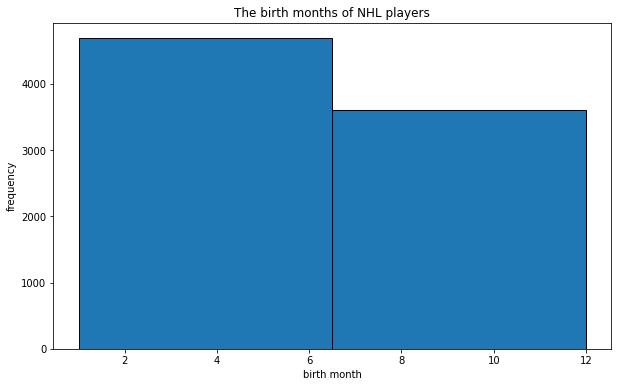

In [6]:
fig = plt.figure(figsize=(10,6))
plt.hist(months, bins=2,edgecolor='k')
plt.title('The birth months of NHL players')  #Name the figure
plt.xlabel('birth month')   #Name the x-axis
plt.ylabel('frequency')     #Name the y-axis
plt.show()

We can see that there are significantly more players born in the first half of the year. Can you figure out why this is the case?

If your goal was to learn the very basics of histograms, reading the above is enough. Please continue reading if you want to get deeper into histograms and their properties.

## The difference to bar charts

Another important tool for data-analysis is the bar chart. It is important to know the difference between the histogram and the bar chart. In a bar chart the data is separated into different categories that have no specific order between each other. The categories are represented as bars which show the frequencies. In a bar chart the bars don't touch each other, as opposed to a histogram. The order of the bars can also be changed, since they have no specific order.

Let us next build a bar chart of the home countries of the players.

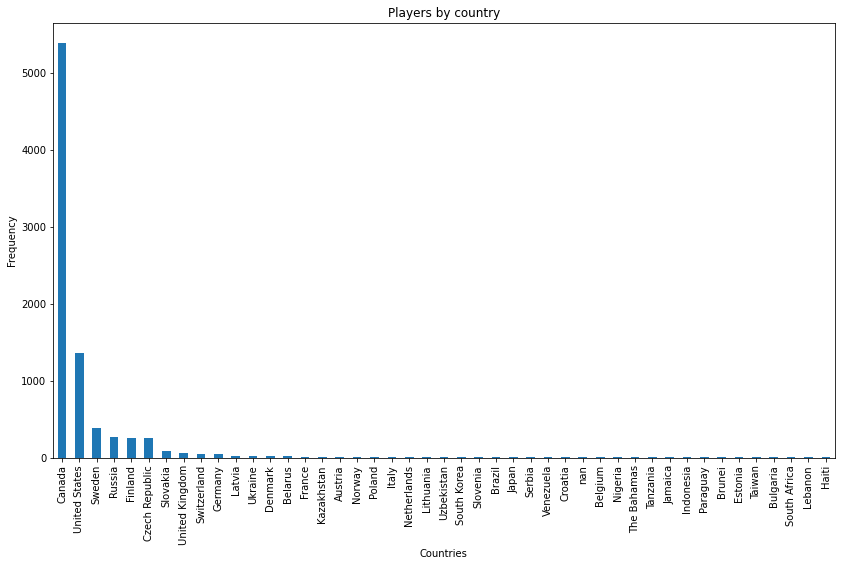

In [7]:
countries = nhl_data['Country'].astype(str)    #Save the home countries of the players to a variable.
ax = countries.value_counts().plot(kind='bar', figsize=(14,8), title="Players by country")  #Draw the figure
ax.set_xlabel("Countries")    #Name the axes
ax.set_ylabel("Frequency")
plt.show()

In the figure above the countries are arranged by how many NHL-players are from them. However, this isn't necessary. We could just as well put the countries in e.g. alphabetical order.

## Distributions

With histograms, we can often approximate a distribution that shows the probability of different values of a variable. The more we have the data, the better we can approximate the distribution. Let us use the weights of the NHL-players as an example. Let's make an animation that shows how the distribution appears when we add the amount of data points. The data has been gathered from Jatkoaika.com on the 22th of June in 2022.

In [8]:
#Save the biometric data of the players to a variable
nhl_biometrics = pd.read_csv("https://raw.githubusercontent.com/opendata-education/Python-ja-Jupyter/main/materiaali/harjoitukset/NHL_biometrics.csv")
nhl_biometrics.head()

,Player,Team,Age,Height (cm),Weight (kg),Stick
0,Nick Abruzzese,Toronto,22,178,79,left
1,Noel Acciari,Florida,30,178,95,right
2,Sebastian Aho,NY Islanders,26,177,83,left
3,Sebastian Aho,Carolina,24,183,80,left
4,Jake Allen,Montreal,31,188,86,left


In [9]:
#Save the weights of the players to a variable
weights = nhl_biometrics['Weight (kg)']

In [10]:
#Import the needed libraries
import matplotlib.animation as animation
from scipy.stats import norm

def updt_hist(num, weights):
    plt.cla()
    plt.xlim((70,120))
    plt.hist(weights[:num*10], bins = 50)
    plt.gca().set_title('Normal distribution from the weights of the players')
    plt.gca().set_ylabel('frequency')
    plt.gca().set_xlabel('weight (kg)')

ModuleNotFoundError: No module named 'scipy'

In [11]:
%%capture
#This so-called magic-function stops extra frames from appearing on the screen during the animation.

#Initialize the figure
fig = plt.figure(figsize=(15,10))

#Make the animation
anim = animation.FuncAnimation(fig, updt_hist, frames = 100, fargs = (weights,))

#Make an HTML representation of the animation
from IPython.display import HTML
HTML(anim.to_jshtml())

NameError: name 'updt_hist' is not defined

In [12]:
#After you've run this cell, scroll down and you'll see the animation.
HTML(anim.to_jshtml())

NameError: name 'HTML' is not defined

The weights of the players follow the **normal distribution**. The normal distribution or the Gaussian distribution appears everywhere in nature from the weights of humans to particle physics. When the amount of data increases, the plot starts to resemble the normal distribution more and more. 

When you run the code below, you can see the normal distribution with mean 0 and standard deviation 1.

In [13]:
import scipy.stats

mu, sigma = scipy.stats.norm.fit(weights)

mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.show()

ModuleNotFoundError: No module named 'scipy'

### An optional (difficult) exercise: Fit the normal distribution to the histogram above.